## KDD CUP 2012 project with Machine Learning


### Loading In the Data

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
fname = "./gdrive/MyDrive/KDD_Project/Data/KDD_train.csv"
import pandas as pd
datas = pd.read_csv(fname)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
import re
from collections import Counter

### Inspect the Data

Display Top 5 row of our Dataset


In [4]:
datas.head()

,ID,Click,DisplayURL,AdId,AdvertiserId,Depth,Position,Gender,Age,AdKeyword_tokens,AdTitle_tokens,AdDescription_tokens,Query_tokens
0,3585022,1,5079901068051390251,4261847,25928,2,2,2,6,53|225|6,53|225|6|739|1590|221|394,176|881|3|53|225|6|1|739|1590|221|394|3,225|105|6
1,3072980,0,12575528779388759460,3112706,23778,2,1,2,3,3624|395,3683|1683|3155,3683|1683|3155|1|2367|69|1683|3803|728|8484|26...,395|3051|1990
2,1385459,0,2412771796110463309,20067154,23781,3,3,1,2,1545|75|31,35|2233|1545|75|31|172|46|467|170|2233|58052|1...,172|46|467|170|5634|5112|40|155|1965|834|21|41...,1545|75|31
3,1241189,0,14340390157469404125,10110402,23808,1,1,2,4,366|270,69|366|270|1|37|1270|1|466|164|616,1671|771|111|187|1|1170|33|2357|119|1|16457|99...,366|0|270|17
4,2949285,0,9573487645018952575,1918047,1339,2,2,2,3,2219|2323|600,2219|2323|600|0|11|207|3073|2680|3,36|2219|2323|600|1|37|1460|872|6|3|169|207|130...,2219|30|600|6


In [5]:
data = datas.sample(100000, replace=True)

In [6]:
data.head()

,ID,Click,DisplayURL,AdId,AdvertiserId,Depth,Position,Gender,Age,AdKeyword_tokens,AdTitle_tokens,AdDescription_tokens,Query_tokens
3914894,3668734,0,5468727571223080485,4214364,1381,2,2,1,1,271|209|158,248|115|1|1652|93|973|2318|2264|3|271|209|158,59|857|1|246|271|209|158|1632|1|16058|3459|14|...,271|19472
480369,1033654,0,12704534509178712543,20006603,29579,3,1,1,6,18109|3360,7|2700|3360|54|25|14938|1613|7|131,429|2700|3360|7|68|2|4|106|34|25|14938|1613|7|...,18109|3360|80|120|11|22
1753589,2238663,0,1298563154454672898,21302287,8506,2,2,1,3,43|1105|132,43|1105|132|311|901|946|306|12145|6439|273|3,43|1105|132|0|98|41|4035|1373|1|10137|215|8280...,43|1105|132|7752|453
3090940,5149767,0,5511132461021800102,20578712,10040,2,1,1,2,1074|47107,1074|47107|0|53|35069|1074|4105|49,1074|47107|1|35069|1074|1|24970|19350|1|197|10...,254761|4413|39|4404
3596239,758662,0,7703279069701542953,4256081,4983,1,1,2,6,13521,13521|5|3843|231|0|12165|384|33979|7698|436,13521|1|20|134|33|231|1|69|2228|111|1|535|142|...,13521|12266|91658|3835


Dealing with the AdKeyword_tokens', 'AdTitle_tokens',
    'AdDescription_tokens', 'Query_tokens'

In [ ]:
#def split_labels(labels):
#  label_list = []
#  for i in labels:
#    label_list.append(''.join(str(i).split('|')))
# return(label_list)

In [ ]:
#data[['AdKeyword_tokens', 'AdTitle_tokens',
#       'AdDescription_tokens', 'Query_tokens']] =data[['AdKeyword_tokens', 'AdTitle_tokens',
#       'AdDescription_tokens', 'Query_tokens']].apply(lambda x: split_labels(x))

Data Correlation

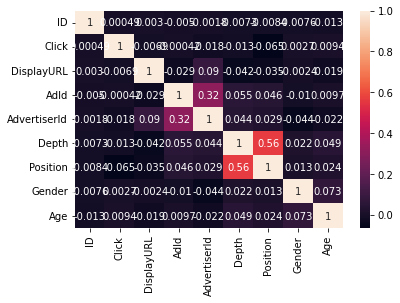

In [7]:
a = data.corr()
sns.heatmap(a, annot=True)
plt.show()

Check the Shape of our data

In [8]:
data.shape

(100000, 13)

Get informaton about our dataset

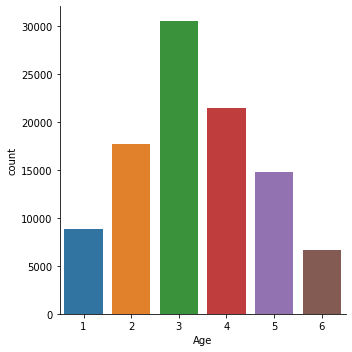

In [9]:
sns.catplot(x="Age", kind="count", data=data)

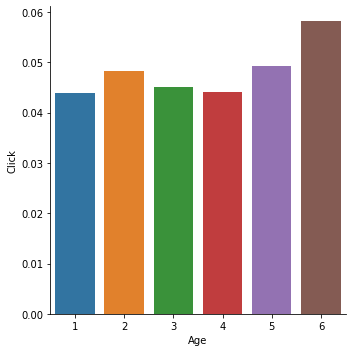

In [10]:
sns.catplot(x="Age", y="Click", kind="bar", data=data, n_boot=1)

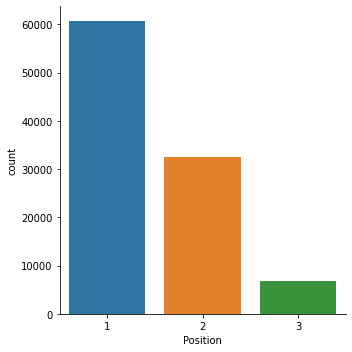

In [11]:
sns.catplot(x="Position", kind="count", data=data)

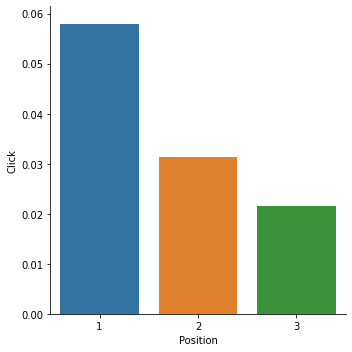

In [12]:
sns.catplot(x="Position", y="Click", kind="bar", data=data, n_boot=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 462 to 56229
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    100000 non-null  int64  
 1   Click                 100000 non-null  int64  
 2   DisplayURL            100000 non-null  float64
 3   AdId                  100000 non-null  int64  
 4   AdvertiserId          100000 non-null  int64  
 5   Depth                 100000 non-null  int64  
 6   Position              100000 non-null  int64  
 7   Gender                100000 non-null  int64  
 8   Age                   100000 non-null  int64  
 9   AdKeyword_tokens      100000 non-null  object 
 10  AdTitle_tokens        100000 non-null  object 
 11  AdDescription_tokens  100000 non-null  object 
 12  Query_tokens          100000 non-null  object 
dtypes: float64(1), int64(8), object(4)
memory usage: 10.7+ MB


Check for Null values

In [ ]:
data.isnull().sum()

ID                      0
Click                   0
DisplayURL              0
AdId                    0
AdvertiserId            0
Depth                   0
Position                0
Gender                  0
Age                     0
AdKeyword_tokens        0
AdTitle_tokens          0
AdDescription_tokens    0
Query_tokens            0
dtype: int64

Check for unique values

In [ ]:
data.nunique()

ID                      62343
Click                       2
DisplayURL               8709
AdId                    23629
AdvertiserId             6555
Depth                       3
Position                    3
Gender                      3
Age                         6
AdKeyword_tokens        24431
AdTitle_tokens          33140
AdDescription_tokens    28685
Query_tokens            41565
dtype: int64

Check for overall stats of the Dataset

In [ ]:
data[['DisplayURL', 'AdId', 'AdvertiserId' ]].var()

DisplayURL      2.439934e+37
AdId            5.073808e+13
AdvertiserId    1.361418e+08
dtype: float64

In [ ]:
data.describe()

,ID,Click,DisplayURL,AdId,AdvertiserId,Depth,Position,Gender,Age
count,1.000000e+05,100000.00000,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,2.988888e+06,0.04672,9.715341e+18,1.617269e+07,22839.536600,1.910780,1.464780,1.426660,3.36278
std,1.735631e+06,0.21104,4.939569e+18,7.123067e+06,11667.981608,0.694611,0.620051,0.524141,1.34596
min,1.080000e+02,0.00000,5.100004e+14,1.000515e+06,81.000000,1.000000,1.000000,0.000000,1.00000
25%,1.471933e+06,0.00000,5.511132e+18,9.028034e+06,16357.000000,1.000000,1.000000,1.000000,2.00000
50%,2.988966e+06,0.00000,1.049634e+19,2.029968e+07,23808.000000,2.000000,1.000000,1.000000,3.00000
75%,4.493042e+06,0.00000,1.434039e+19,2.116393e+07,32446.000000,2.000000,2.000000,2.000000,4.00000
max,5.999956e+06,1.00000,1.844123e+19,2.222734e+07,39042.000000,3.000000,3.000000,2.000000,6.00000


Inspecting the Target variable

0    0.95328
1    0.04672
Name: Click, dtype: float64

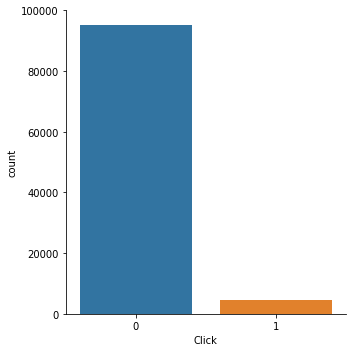

In [ ]:
# Target variable is Click
sns.catplot(x="Click", kind="count", data=data)
data['Click'].value_counts(normalize=True)

We noticed that we have an Imbalance class and we have to find the best Metrics to it. 95% to 5% of data


### Exploration Of the Text columns


In [ ]:
text_columns=['AdKeyword_tokens', 'AdTitle_tokens','AdDescription_tokens', 'Query_tokens']

In [ ]:
avg_lengths = []
n_unique_words = []
n_words_covering_most_vocabulary = []
length_quantiles = []

for text_column in text_columns:
    print(text_column)
    text = data[text_column].str.split("|")

    QUANTILE= 0.95
    lengths = [len(tokens) for tokens in text.values]
    avg_len = np.mean(lengths)
    print(f"Average length of {text_column}: {avg_len:.2f}")
    avg_lengths.append(avg_len)
    len_quantile = np.quantile(lengths, QUANTILE)
    length_quantiles.append(len_quantile)
    print(f"{QUANTILE*100:.0f}% quantile of length: {len_quantile}")

    all_words = []
    for words in text.values:
        all_words.extend(words)
    # sorted counts of words (biggest first)
    all_words_count_values = [v for k, v in sorted(Counter(all_words).items(), key=lambda item: item[1], reverse=True)]  

    number_of_words = len(all_words_count_values)
    print(f"Number of unique words in {text_column}: {number_of_words}")
    n_unique_words.append(number_of_words)

AdKeyword_tokens
Average length of AdKeyword_tokens: 2.11
95% quantile of length: 4.0
Number of unique words in AdKeyword_tokens: 11662
AdTitle_tokens
Average length of AdTitle_tokens: 8.80
95% quantile of length: 14.0
Number of unique words in AdTitle_tokens: 17383
AdDescription_tokens
Average length of AdDescription_tokens: 21.32
95% quantile of length: 28.0
Number of unique words in AdDescription_tokens: 24773
Query_tokens
Average length of Query_tokens: 3.01
95% quantile of length: 6.0
Number of unique words in Query_tokens: 22608


### Dropping some Columns


In [ ]:
data.columns

Index(['ID', 'Click', 'DisplayURL', 'AdId', 'AdvertiserId', 'Depth',
       'Position', 'Gender', 'Age', 'AdKeyword_tokens', 'AdTitle_tokens',
       'AdDescription_tokens', 'Query_tokens'],
      dtype='object')

In [ ]:
data1 = data.drop(['ID', 'AdKeyword_tokens', 'AdTitle_tokens',
       'AdDescription_tokens', 'Query_tokens'], axis=1)

In [ ]:
X = data1.drop('Click', axis=1)
y = data1['Click']

In [ ]:
X.columns

Index(['DisplayURL', 'AdId', 'AdvertiserId', 'Depth', 'Position', 'Gender',
       'Age'],
      dtype='object')

## Handling imbalance class with SMOTE


In [ ]:
from imblearn.over_sampling import SMOTE
X_res, y_res = SMOTE().fit_resample(X,y)

In [ ]:
y_res.value_counts()

0    95328
1    95328
Name: Click, dtype: int64

Splitting Our Data to Train and test data


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res,
                                                    y_res,
                                                    test_size= 0.33,
                                                    random_state=42
                                                    
                                                    )

In [ ]:
print(y_test.shape)
print(X_train.shape)

(62917,)
(127739, 7)


### Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[-1.31301571, -0.64610611, -0.84427825,  1.19205727],
       [ 1.62813395, -0.64610611,  1.07229861,  0.45668378],
       [-1.31301571, -0.64610611,  1.07229861, -1.01406321],
       ...,
       [-1.31301571, -0.64610611,  1.07229861, -0.27868972],
       [ 0.15755912,  1.10716361,  1.07229861, -1.01406321],
       [ 0.15755912, -0.64610611,  1.07229861, -1.01406321]])

### Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)

Metrics

              precision    recall  f1-score   support

           0       0.68      0.51      0.58     31416
           1       0.61      0.77      0.68     31501

    accuracy                           0.64     62917
   macro avg       0.65      0.64      0.63     62917
weighted avg       0.65      0.64      0.63     62917



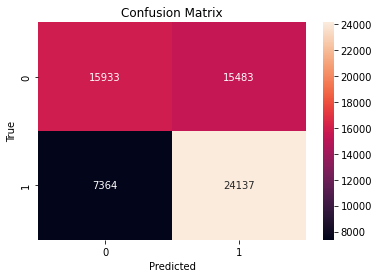

In [ ]:
#Confusion matrix and classification report for Logistic regression
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, roc_auc_score, precision_score 

In [ ]:
accuracy_score(y_test, y_pred=y_pred)

0.6368707980355071

In [ ]:
precision_score(y_test, y_pred=y_pred)

0.6092125189298334

In [ ]:
recall_score(y_test, y_pred=y_pred)

0.7662296435033809

In [ ]:
f1_score(y_test, y_pred=y_pred)

0.6787587351133982

### Roc Auc

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresh = roc_curve(y_test, y_pred, pos_label=1)


In [ ]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [ ]:
auc_score = roc_auc_score(y_test, y_pred)

In [ ]:
np.unique(y_pred)

array([0, 1])

In [ ]:
auc_score

0.6366957995973741

### SVC

In [ ]:
from sklearn import svm

In [ ]:
svm = svm.SVC()

In [ ]:
#svm.fit(X_train, y_train)

### KNeigbour Classiffer

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits)
cv_results = cross_val_score(knn, X_train, y_train, cv=skf, scoring = 'roc_auc')
print(f'Cross-Validation results: {cv_results, cv_results.mean()}')

knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)
print(f'ROC-AUC on test set: {roc_auc_score(y_test, knn.predict(X_test))}')

Cross-Validation results: (array([0.89976205, 0.90277444, 0.9015292 , 0.90268694, 0.90255853]), 0.9018622326496522)
ROC-AUC on test set: 0.8325005675625498


In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred2 = knn.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred=y_pred2)

0.8640748923184512

In [ ]:
precision_score(y_test, y_pred=y_pred2)

0.8347970705803403

In [ ]:
recall_score(y_test, y_pred=y_pred2)

0.908256880733945

In [ ]:
f1_score(y_test, y_pred=y_pred2)

0.8699790190652842

              precision    recall  f1-score   support

           0       0.90      0.82      0.86     31416
           1       0.83      0.91      0.87     31501

    accuracy                           0.86     62917
   macro avg       0.87      0.86      0.86     62917
weighted avg       0.87      0.86      0.86     62917



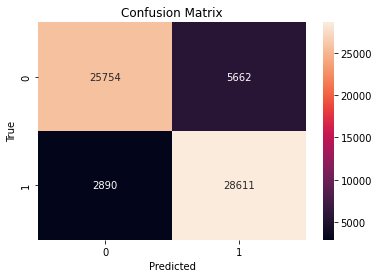

In [ ]:
#Confusion matrix and classification report for Knn
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_test, y_pred2)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, y_pred2))

### Decision Tree classifer

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from IPython.display import Image

In [ ]:
def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(
        tree, feature_names=feature_names, filled=True, out_file=None
    )
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(png_file_to_save)

In [ ]:
#!mkdir /content/gdrive/MyDrive/KDD_Project/Img

In [ ]:
random_state=29
dt = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 300, random_state=random_state)

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=300, random_state=29)

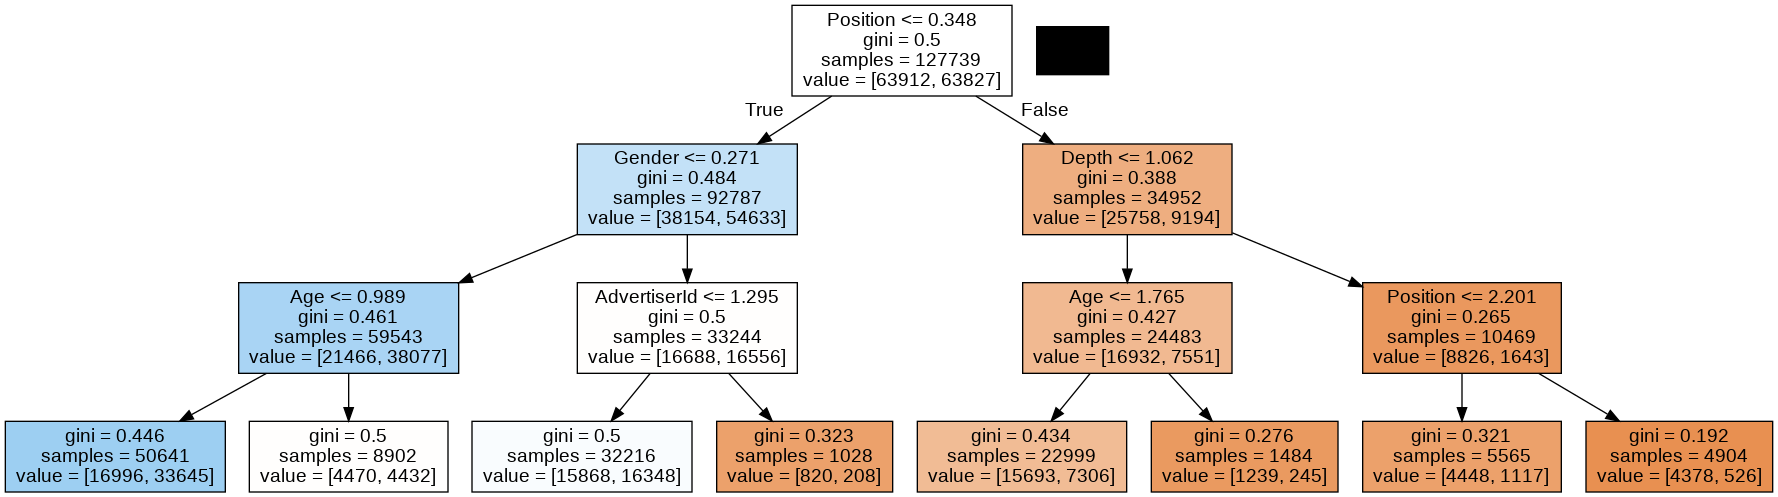

In [ ]:
png_path = '/content/gdrive/MyDrive/KDD_Project/Img/example_tree.png'
tree_graph_to_png(dt,['DisplayURL', 'AdId', 'AdvertiserId','Depth', 'Position', 'Gender', 'Age'], png_path)
Image(filename=png_path)

In [ ]:
# Auxiliary function that will return grid for further visualization.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 1))

In [ ]:
dt = DecisionTreeClassifier(criterion="entropy",
                            min_samples_leaf=50,
                            max_depth=8,
                            random_state=random_state)


n_splits = 5
skf = StratifiedKFold(n_splits=n_splits)
cv_results = cross_val_score(dt, X_train, y_train, cv=skf, scoring = 'roc_auc')
print(f'Cross-Validation results: {cv_results, cv_results.mean()}')

dt = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_leaf=100, random_state=random_state)
dt.fit(X_train, y_train)
print(f'ROC-AUC on test set: {roc_auc_score(y_test, dt.predict(X_test))}')



Cross-Validation results: (array([0.73194178, 0.73238006, 0.73613397, 0.73405847, 0.72931993]), 0.7327668444242471)
ROC-AUC on test set: 0.6357842639091646


In [ ]:
y_pred3 = dt.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred=y_pred3)

0.6359807365258991

In [ ]:
precision_score(y_test, y_pred=y_pred3)

0.605834564254062

In [ ]:
recall_score(y_test, y_pred=y_pred3)

0.7812132948160376

In [ ]:
f1_score(y_test, y_pred=y_pred3)

0.6824364609475742

              precision    recall  f1-score   support

           0       0.69      0.49      0.57     31416
           1       0.61      0.78      0.68     31501

    accuracy                           0.64     62917
   macro avg       0.65      0.64      0.63     62917
weighted avg       0.65      0.64      0.63     62917



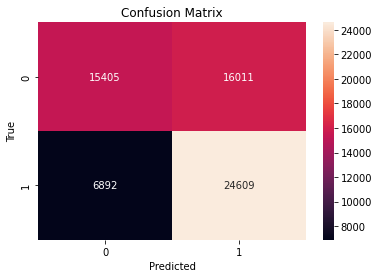

In [ ]:
#Confusion matrix and classification report for Decision tree
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_test, y_pred3)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, y_pred3))

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf =RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits)
cv_results = cross_val_score(rf, X_train, y_train, cv=skf, scoring = 'roc_auc')
print(f'Cross-Validation results: {cv_results, cv_results.mean()}')

rf = RandomForestClassifier(criterion="entropy", max_depth=3, min_samples_leaf=100, random_state=random_state)
rf.fit(X_train, y_train)
print(f'ROC-AUC on test set: {roc_auc_score(y_test, rf.predict(X_test))}')


Cross-Validation results: (array([0.96718836, 0.96579427, 0.96783425, 0.96872312, 0.96575787]), 0.9670595718890501)
ROC-AUC on test set: 0.6488287374509241


In [ ]:
y_pred4 = rf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred=y_pred4)

0.6490296740149721

In [ ]:
precision_score(y_test, y_pred=y_pred4)

0.6153469347767518

In [ ]:
recall_score(y_test, y_pred=y_pred4)

0.7975619821592965

In [ ]:
f1_score(y_test, y_pred=y_pred4)

0.6947048251071478

              precision    recall  f1-score   support

           0       0.71      0.50      0.59     31416
           1       0.62      0.80      0.69     31501

    accuracy                           0.65     62917
   macro avg       0.66      0.65      0.64     62917
weighted avg       0.66      0.65      0.64     62917



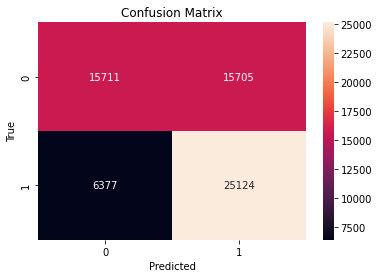

In [ ]:
#Confusion matrix and classification report for Decision tree
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_test, y_pred4)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, y_pred4))

### gradient boost classifer

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc= GradientBoostingClassifier()

In [ ]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
y_pred5 = gbc.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred=y_pred5)

0.5791702778277436

In [ ]:
precision_score(y_test, y_pred=y_pred5)

0.6742836314697471

In [ ]:
recall_score(y_test, y_pred=y_pred5)

0.7634360813942415

In [ ]:
f1_score(y_test, y_pred=y_pred5)

0.716095701758304

              precision    recall  f1-score   support

           0       0.73      0.63      0.67     31416
           1       0.67      0.76      0.72     31501

    accuracy                           0.70     62917
   macro avg       0.70      0.70      0.70     62917
weighted avg       0.70      0.70      0.70     62917



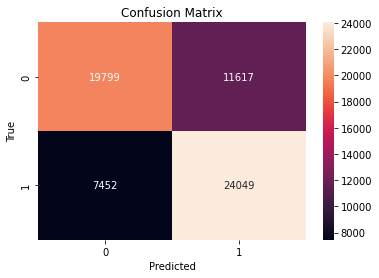

In [ ]:
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_test, y_pred5)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, y_pred5))

In [ ]:
df= pd.DataFrame({'Model':['LR','KNN','DTC', 'RFC', 'GBC'],
              'Accuracy Score': [accuracy_score(y_test, y_pred=y_pred),
                                 accuracy_score(y_test, y_pred=y_pred2),
                                 accuracy_score(y_test, y_pred=y_pred3),
                                 accuracy_score(y_test, y_pred=y_pred4),
                                 accuracy_score(y_test, y_pred=y_pred5)],
              'Precision Score': [precision_score(y_test, y_pred=y_pred),
                                  precision_score(y_test, y_pred=y_pred2),
                                  precision_score(y_test, y_pred=y_pred3),
                                  precision_score(y_test, y_pred=y_pred4),
                                  precision_score(y_test, y_pred=y_pred5)],
              'Recall Score': [recall_score(y_test, y_pred=y_pred),
                               recall_score(y_test, y_pred=y_pred2),
                               recall_score(y_test, y_pred=y_pred3),
                               recall_score(y_test, y_pred=y_pred4),
                               recall_score(y_test, y_pred=y_pred5)],
              'F1 Score': [f1_score(y_test, y_pred=y_pred),
                           f1_score(y_test, y_pred=y_pred2),
                           f1_score(y_test, y_pred=y_pred3),
                           f1_score(y_test, y_pred=y_pred4),
                           f1_score(y_test, y_pred=y_pred5)]})

In [ ]:
df

,Model,Accuracy Score,Precision Score,Recall Score,F1 Score
0,LR,0.636871,0.609213,0.766230,0.678759
1,KNN,0.864075,0.834797,0.908257,0.869979
2,DTC,0.635981,0.605835,0.781213,0.682436
3,RFC,0.649030,0.615347,0.797562,0.694705
4,GBC,0.696918,0.674284,0.763436,0.716096


prediction on new data


In [ ]:
da = pd.DataFrame({''})